<h2><center>Метрики: ROC-AUC</center></h2>

In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

from ipywidgets import interact, IntSlider, FloatSlider

## Метрики классификации

* Как правило, классификаторы выдают не просто предсказанную метку класса, но и степень уверенности в ней
* Основные меры качества
    * Accuracy
    * Precision, Recall, F-мера
    * **ROC-AUC**
    * Log-loss

## Precision / Recall
* Вычисляются на бинарных предсказания
<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/800px-Precisionrecall.svg.png" width=40%> </center>

## ROC кривая

* Выбор порога классификации - отдельная большая задача
* Можно ли как-то обойтись без него и сравнить неколько моделей?
* ROC кривая - показывает зависимость между TPR (верным предсказанием) и FPR (ложным срабатыванием)


## ROC кривая: способ вычисления

* Классификатор $a(x)$ возвращает степень принадлежности к классу "+1" - score(x).
* Упорядочим объекты по убыванию score(x)
* Смотрим сверху вниз
    * Если объект принадлежит классу "+1" - сдвиг вверх на $1/Pos$
    * Если объект принадлежит классу "-1" - сдвиг вправо на $1/Neg$
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
</style>
<table class="tg">
  <tr>
    <th class="tg-031e"><img src='img/roc1.png'></th>
    <th class="tg-031e"><img src='img/roc2.png'></th>
  </tr>
</table>

## Как сравнивать ROC-кривые?
<center><img src='img/roc.png'></center>

## ROC-AUC
* Площадь под ROC кривой

* AUC$\in[0,1]$
    * AUC = 0.5 - случайный классификатора
    * AUC = 1 - идеальный классификатор
    
* Не зависит от абсолютных значений -- только от порядка объектов
* "Физический смысл" AUC ROC: доля пар объектов вида (объект класса 1, объект класса 0), которые алгоритм верно упорядочил
* Часто применяется для несбалансированных данных

Интерактивное демо: http://www.navan.name/roc/

## Примеры

In [12]:
from sklearn.metrics import roc_auc_score, roc_curve

y_true = np.random.uniform(low=0.0, high=1.0, size=10000) > 0.85
y_random = np.random.randn(len(y_true))

In [16]:
y_random

array([ 0.40565576, -0.15805184, -3.31847076, ..., -0.11628361,
        1.71748258, -1.04602873])

In [17]:
roc_auc_score(y_true, y_random)

0.5077516372754342

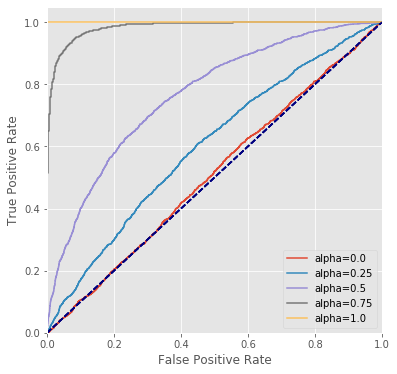

In [19]:
plt.figure(figsize=(6,6))
for alpha in np.linspace(0, 1, 5):
    y_mix = y_true * alpha + y_random * (1-alpha)
    fpr, tpr, _ = roc_curve(y_true, y_mix)
    plt.plot(fpr, tpr, label="alpha={}".format(alpha))
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plt.legend()

In [20]:
alpha = 0.75
y_mix = -1 * (y_true * alpha + y_random * (1-alpha))

roc_auc_score(y_true, y_mix)

0.01649899876693626

In [21]:
roc_auc_score(y_true, -y_mix)

0.9835010012330637